___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-3 (RNN)<br><br>Product Amount Forecast by Time<br><h1>

# Dataset Info

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Indest Data

In [4]:
df = pd.read_csv('Frozen_Dessert_Production.csv',index_col='DATE', parse_dates = True)

In [6]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [26]:
df.columns = ['Production']

In [27]:
df.describe()

,Production
count,573.000
mean,109.896
std,27.951
min,58.660
25%,88.936
50%,107.643
75%,128.278
max,196.174


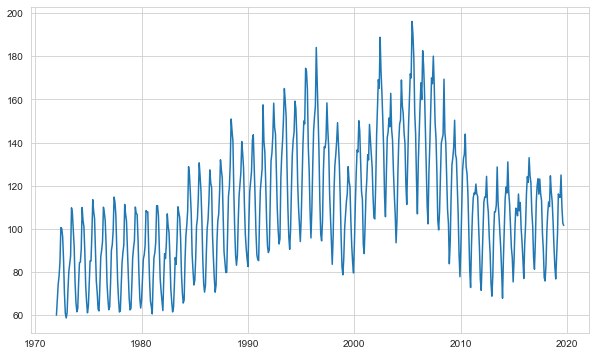

In [28]:
plt.plot(df["Production"]);

In [29]:
df.isnull().any()

Production    False
dtype: bool

# Preprocessing of Data

## Train Test Split

In [30]:
len(df)

573

In [31]:
test_size = 24

In [32]:
test_ind = len(df)- test_size
test_ind

549

In [33]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [34]:
train

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2017-05-01,116.064
2017-06-01,123.087
2017-07-01,116.264


In [35]:
test

,Production
DATE,
2017-10-01,90.473
2017-11-01,77.438
2017-12-01,75.812
2018-01-01,83.434
2018-02-01,99.490
2018-03-01,107.315
2018-04-01,112.431
2018-05-01,110.354
2018-06-01,124.584


## Scaling

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()

In [38]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [39]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [40]:
length = 12
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)

In [41]:
len(generator)

537

In [42]:
generator[0]

(array([[[0.00947104],
         [0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ]]]),
 array([[0.01774221]]))

In [43]:
X, y = generator[0]

In [44]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.        ]
Predict this y: 
 [[0.01774221]]


# Modelling & Model Performance

## with "tanh" activation function

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [46]:
train_scaled.shape

(549, 1)

In [47]:
n_features = train_scaled.shape[1]

In [75]:
model = Sequential()
model.add(LSTM(50, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(25, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [76]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 12, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 25)                7600      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 18,026
Trainable params: 18,026
Non-trainable params: 0
_________________________________________________________________


In [77]:
from tensorflow.keras.callbacks import EarlyStopping

In [84]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 4, restore_best_weights = True)

In [80]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [81]:
len(validation_generator)

12

In [85]:
model.fit(x = generator,
          epochs = 120,
          validation_data = validation_generator,
          callbacks = [early_stop])

Epoch 1/120
537/537 [==============================] - 4s 7ms/step - loss: 0.0062 - val_loss: 0.0016
Epoch 2/120
537/537 [==============================] - 3s 6ms/step - loss: 0.0047 - val_loss: 0.0028
Epoch 3/120
537/537 [==============================] - 4s 7ms/step - loss: 0.0038 - val_loss: 0.0019
Epoch 4/120
537/537 [==============================] - 4s 7ms/step - loss: 0.0039 - val_loss: 0.0030
Epoch 5/120
537/537 [==============================] - 3s 6ms/step - loss: 0.0036 - val_loss: 0.0023


<AxesSubplot:>

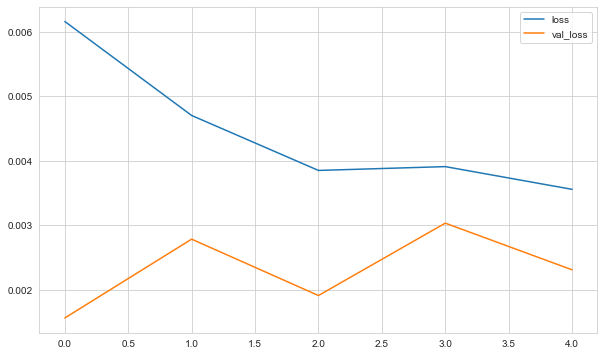

In [86]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Evaluation on Test Data

In [87]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [88]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [89]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

1/1 [==============================] - 0s 20ms/step


In [90]:
predictions_scaled

[array([0.2658089], dtype=float32),
 array([0.23385365], dtype=float32),
 array([0.26050925], dtype=float32),
 array([0.3296157], dtype=float32),
 array([0.3966095], dtype=float32),
 array([0.44191217], dtype=float32),
 array([0.47255], dtype=float32),
 array([0.48140493], dtype=float32),
 array([0.47920677], dtype=float32),
 array([0.4333603], dtype=float32),
 array([0.37638637], dtype=float32),
 array([0.31284666], dtype=float32)]

In [91]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.41618146011551005 
mae: 0.06898171253999223 
mse: 0.007280590131924725 
rmse: 0.08532637418714524


### Inverse Transformation and Comparing

In [92]:
predictions = scaler.inverse_transform(predictions_scaled)

In [93]:
compare = test[:12]

In [94]:
compare['Predictions'] = predictions

In [95]:
compare

,Production,Predictions
DATE,,
2017-10-01,90.473,95.212
2017-11-01,77.438,90.818
2017-12-01,75.812,94.483
2018-01-01,83.434,103.987
2018-02-01,99.490,113.199
2018-03-01,107.315,119.429
2018-04-01,112.431,123.642
2018-05-01,110.354,124.860
2018-06-01,124.584,124.557


<AxesSubplot:xlabel='DATE'>

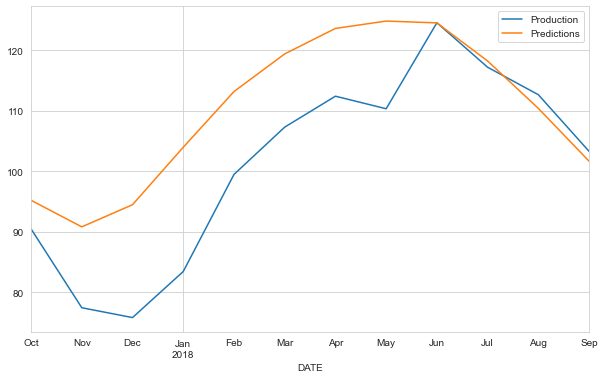

In [96]:
compare.plot()

In [97]:
eval_metrics(compare.Production, compare.Predictions) #model

r2_score: 0.4161814601155108 
mae: 9.48594432005323 
mse: 137.67648864416378 
rmse: 11.733562487333664


## with "relu" activation function

In [138]:
model2 = Sequential()
model2.add(LSTM(64, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model2.add(LSTM(32, activation = 'relu'))
model2.add(Dense(1))
model2.compile(optimizer = 'adam', loss = 'mse')

In [139]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 12, 64)            16896     
                                                                 
 lstm_9 (LSTM)               (None, 32)                12416     
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


In [140]:
model2.fit(x = generator,
          epochs = 120,
          validation_data = validation_generator,
          callbacks = [early_stop])

Epoch 1/120
561/561 [==============================] - 6s 7ms/step - loss: 0.0269 - val_loss: 0.0045
Epoch 2/120
561/561 [==============================] - 4s 7ms/step - loss: 0.0108 - val_loss: 0.0163
Epoch 3/120
561/561 [==============================] - 4s 7ms/step - loss: 0.0088 - val_loss: 0.0031
Epoch 4/120
561/561 [==============================] - 4s 6ms/step - loss: 0.0064 - val_loss: 0.0019
Epoch 5/120
561/561 [==============================] - 4s 7ms/step - loss: 0.0064 - val_loss: 0.0027
Epoch 6/120
561/561 [==============================] - 3s 6ms/step - loss: 0.0061 - val_loss: 0.0030
Epoch 7/120
561/561 [==============================] - 4s 6ms/step - loss: 0.0057 - val_loss: 0.0023
Epoch 8/120
561/561 [==============================] - 4s 6ms/step - loss: 0.0051 - val_loss: 0.0037


<AxesSubplot:>

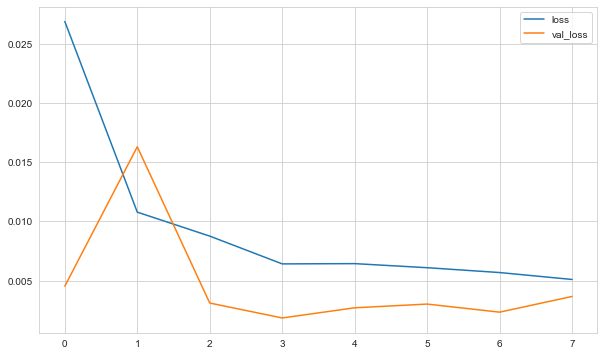

In [141]:
loss_df = pd.DataFrame(model2.history.history)
loss_df.plot()

### Evaluation on Test Data

In [142]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model2.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

1/1 [==============================] - 0s 20ms/step


In [143]:
predictions_scaled

[array([0.30495983], dtype=float32),
 array([0.2139456], dtype=float32),
 array([0.22985843], dtype=float32),
 array([0.31563556], dtype=float32),
 array([0.38995904], dtype=float32),
 array([0.43465084], dtype=float32),
 array([0.43699414], dtype=float32),
 array([0.4540727], dtype=float32),
 array([0.46457514], dtype=float32),
 array([0.44187132], dtype=float32),
 array([0.39365995], dtype=float32),
 array([0.32316092], dtype=float32)]

In [144]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.5676206085878879 
mae: 0.060235740030338526 
mse: 0.0053920472121105935 
rmse: 0.07343056047798215


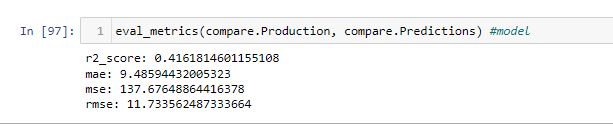

### Inverse Transformation and Comparing

In [145]:
predictions = scaler.inverse_transform(predictions_scaled)

In [146]:
compare = test[:12]

In [147]:
compare['Predictions'] = predictions

In [148]:
compare

,Production,Predictions
DATE,,
2017-10-01,90.473,100.596
2017-11-01,77.438,88.080
2017-12-01,75.812,90.269
2018-01-01,83.434,102.064
2018-02-01,99.490,112.285
2018-03-01,107.315,118.430
2018-04-01,112.431,118.753
2018-05-01,110.354,121.101
2018-06-01,124.584,122.545


<AxesSubplot:xlabel='DATE'>

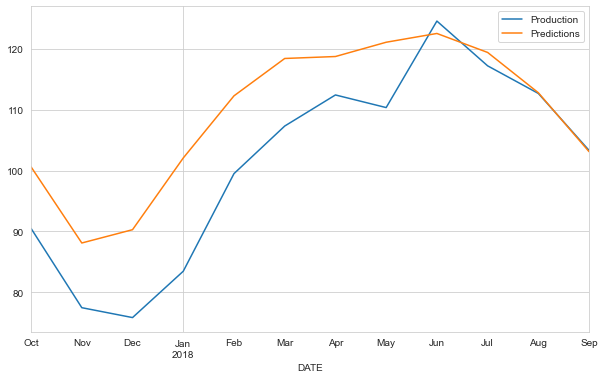

In [149]:
compare.plot()

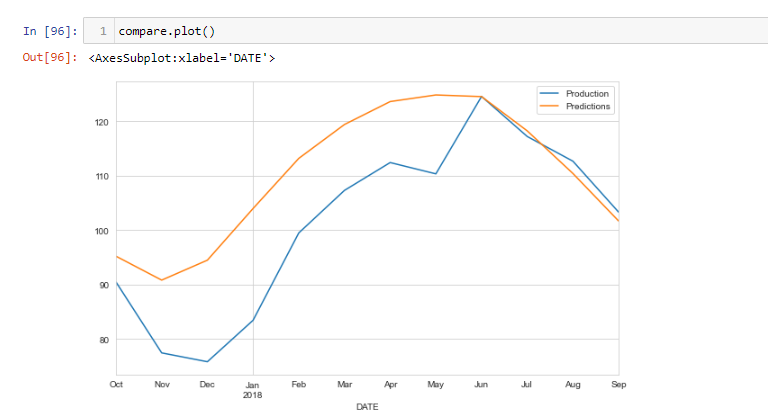

# Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [122]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [123]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [124]:
len(df)

573

In [125]:
len(generator)
#length 12 oldugu icin

561

In [150]:
model = Sequential()
model.add(LSTM(50, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(25, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.fit(x = generator, epochs=15)

Epoch 1/15
561/561 [==============================] - 7s 7ms/step - loss: 0.0259
Epoch 2/15
561/561 [==============================] - 4s 6ms/step - loss: 0.0051
Epoch 3/15
561/561 [==============================] - 4s 6ms/step - loss: 0.0044
Epoch 4/15
561/561 [==============================] - 3s 6ms/step - loss: 0.0041
Epoch 5/15
561/561 [==============================] - 4s 7ms/step - loss: 0.0035
Epoch 6/15
561/561 [==============================] - 4s 6ms/step - loss: 0.0036
Epoch 7/15
561/561 [==============================] - 4s 7ms/step - loss: 0.0037
Epoch 8/15
561/561 [==============================] - 6s 11ms/step - loss: 0.0034
Epoch 9/15
561/561 [==============================] - 6s 10ms/step - loss: 0.0032
Epoch 10/15
561/561 [==============================] - 5s 9ms/step - loss: 0.0032
Epoch 11/15
561/561 [==============================] - 6s 10ms/step - loss: 0.0030
Epoch 12/15
561/561 [==============================] - 4s 8ms/step - loss: 0.0030
Epoch 13/15
561/561 [=

In [151]:
scaled_full_data.shape

(573, 1)

In [152]:
scaled_full_data[-length:].shape

(12, 1)

In [153]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

1/1 [==============================] - 0s 24ms/step


In [154]:
forecast = scaler.inverse_transform(forecast)

In [155]:
forecast

array([[ 88.6493906 ],
       [ 84.028247  ],
       [ 86.64987063],
       [ 95.16047969],
       [104.15969245],
       [111.12879603],
       [116.84543025],
       [121.61436434],
       [123.37711296],
       [119.15975603],
       [111.2418581 ],
       [101.29911312]])

In [156]:
forecast_index = pd.date_range(start = '2019-11-01', periods = length, freq = 'MS')

In [157]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [158]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [159]:
forecast_df

,Forecast
2019-11-01,88.649
2019-12-01,84.028
2020-01-01,86.650
2020-02-01,95.160
2020-03-01,104.160
2020-04-01,111.129
2020-05-01,116.845
2020-06-01,121.614
2020-07-01,123.377
2020-08-01,119.160


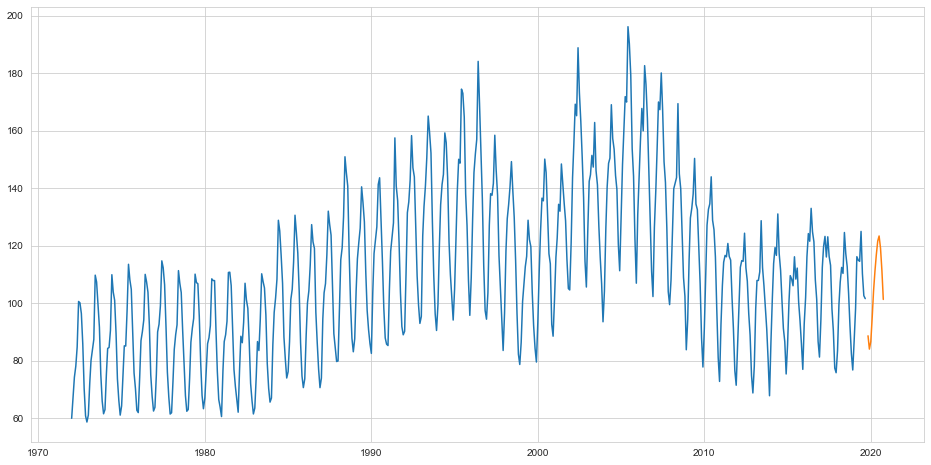

In [161]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['Production'])
plt.plot(forecast_df.index, forecast_df['Forecast'])

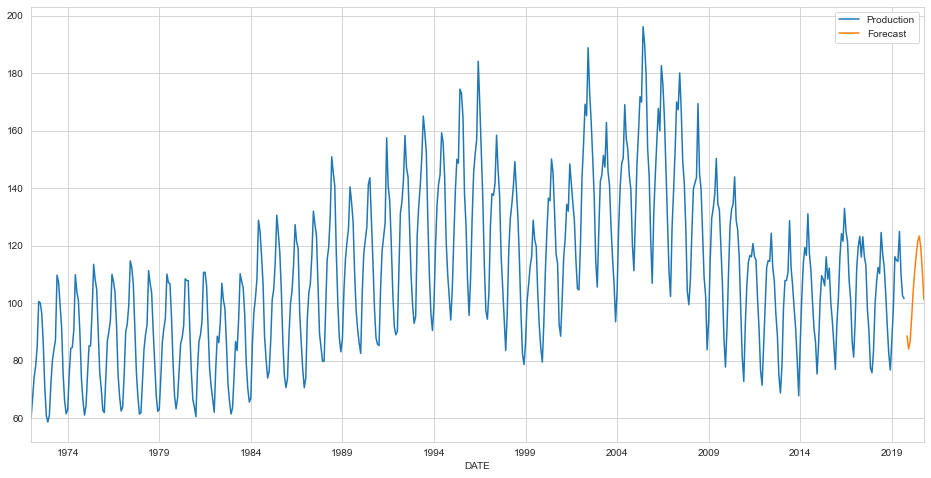

In [162]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(576.0, 611.0)

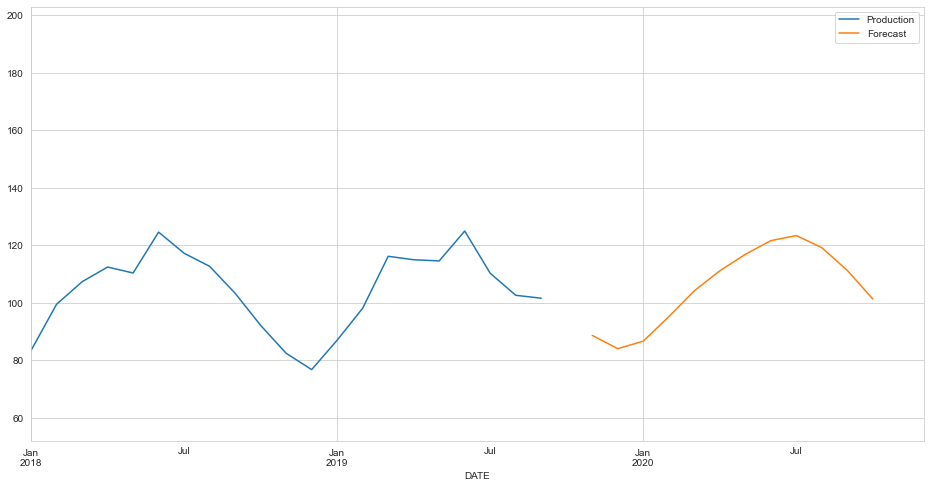

In [163]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2020-12-01')

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___